In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.metrics import mean_absolute_error as mae

# Model performance before data preprocessing

In [2]:
# Load data
train_data = pd.read_csv('train_V2.csv')

In [3]:
# Display original dataset
display(train_data)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.000,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.040,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.000,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.000,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.000,0,0,49.75,2,0,0.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,...,0,1292.0000,0,0.000,0,0,1019.00,3,1507,0.1786
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15,0,0,0,69,...,0,0.0000,0,0.000,0,0,81.70,6,0,0.2935
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,...,0,0.0000,0,2.184,0,0,788.70,4,0,0.4815
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.40,1,1,2,11,...,2,0.0000,0,0.000,0,0,2748.00,8,0,0.8000


In [4]:
# Fill nan with 0
train_data.fillna(0,inplace=True)

# Check for nan
print(np.any(train_data.isna().values))

False


In [5]:
# Sort data by matchId
train_data.sort_values(by='matchId', inplace=True)
display(train_data)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2357956,ffc5bf94121ebc,599d924f8a02db,0000a43bce5eec,0,3,19.35,0,0,0,48,...,0,0.0,0,50.880,0,0,2438.00,4,1500,0.5926
2043479,13228c696667a8,97364d4199bf30,0000a43bce5eec,0,0,0.00,0,0,0,83,...,0,0.0,0,0.000,0,0,13.59,1,1433,0.1111
20251,10ed15afafb7ec,4d1bbbc19b9084,0000a43bce5eec,1,3,151.80,1,1,2,23,...,0,159.9,0,6.545,0,0,3250.00,4,1480,1.0000
3088817,17f3544a0fdde4,236ab9e9c081b9,0000a43bce5eec,0,0,0.00,0,0,0,90,...,0,0.0,0,0.000,0,0,0.00,0,1547,0.0370
3921524,de3ddbf280477e,9cf70fed874fa1,0000a43bce5eec,0,0,74.88,0,0,0,63,...,0,0.0,0,0.000,0,0,252.90,3,1507,0.2963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
576993,e974be08ac0070,6d5fed77f3ae9b,fffe92232706aa,0,0,0.00,0,0,1,75,...,0,0.0,0,0.000,0,0,302.20,4,0,0.1429
2374589,fdfc244e89d141,1de5cb1d16a152,fffe92232706aa,0,0,53.90,0,0,1,63,...,0,0.0,0,0.000,0,0,807.00,1,0,0.3571
2593242,847057ac7da712,d57f3a3ed40913,fffe92232706aa,0,0,0.00,0,0,0,70,...,0,0.0,0,0.000,0,0,69.13,2,0,0.2500
3187811,0083573df3bc11,20493abb7ca1b9,fffe92232706aa,1,2,271.00,3,1,2,7,...,0,1105.0,0,0.000,0,0,2461.00,11,0,0.8929


In [6]:
# Get split index
matches = np.unique(train_data['matchId'].values)
ind = np.argwhere(train_data['matchId'].values==matches[int(len(matches)*9/10)]).flatten()[0]
print('Percentage of data used for training: ', ind/train_data.shape[0])

Percentage of data used for training:  0.9001188675604895


In [7]:
# Check if any matchId is in both train and test data
display(train_data['matchId'].iloc[:ind])
display(train_data['matchId'].iloc[ind:])
print(np.any(np.isin(np.unique(train_data['matchId'].iloc[:ind].values),np.unique(train_data['matchId'].iloc[ind:].values))))

2357956    0000a43bce5eec
2043479    0000a43bce5eec
20251      0000a43bce5eec
3088817    0000a43bce5eec
3921524    0000a43bce5eec
                ...      
2734637    e70b12417e5094
1910593    e70b12417e5094
1404197    e70b12417e5094
1436258    e70b12417e5094
2338972    e70b12417e5094
Name: matchId, Length: 4002798, dtype: object

1977520    e70c3dc5c38eeb
1605161    e70c3dc5c38eeb
3059362    e70c3dc5c38eeb
1083631    e70c3dc5c38eeb
3034703    e70c3dc5c38eeb
                ...      
576993     fffe92232706aa
2374589    fffe92232706aa
2593242    fffe92232706aa
3187811    fffe92232706aa
4040544    fffe92232706aa
Name: matchId, Length: 444168, dtype: object

False


In [8]:
# Get labels for training data
labels = train_data['winPlacePerc']

# Drop categorical features (not supported by XGBoost)
features_df = train_data.drop(['Id','groupId','matchId','matchType','winPlacePerc'], axis=1)

# Create train/test splits:
train_df = features_df.iloc[:ind,:]
train_labels = labels.iloc[:ind]
test_df = features_df.iloc[ind:,:]
test_labels = labels.iloc[ind:]

# Create DMatrix objects for train data features (no labels), train data and test data
train_dm = xgb.DMatrix(train_df, label=train_labels, missing=0)
test_dm = xgb.DMatrix(test_df, missing=0)

C:\Users\Rafael\Anaconda2\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Rafael\Anaconda2\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [9]:
# Display labels
display(train_labels)
display(test_labels)

2357956    0.5926
2043479    0.1111
20251      1.0000
3088817    0.0370
3921524    0.2963
            ...  
2734637    0.5833
1910593    0.0000
1404197    0.2292
1436258    0.8750
2338972    0.6875
Name: winPlacePerc, Length: 4002798, dtype: float64

1977520    0.2708
1605161    0.7083
3059362    0.0000
1083631    0.0625
3034703    0.2292
            ...  
576993     0.1429
2374589    0.3571
2593242    0.2500
3187811    0.8929
4040544    0.6071
Name: winPlacePerc, Length: 444168, dtype: float64

In [10]:
# Display train/test features (no labels)
display(train_df)
display(test_df)

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints
2357956,0,3,19.35,0,0,0,48,1000,0,0,...,0,0,0.0,0,50.880,0,0,2438.00,4,1500
2043479,0,0,0.00,0,0,0,83,1382,0,0,...,0,0,0.0,0,0.000,0,0,13.59,1,1433
20251,1,3,151.80,1,1,2,23,1308,1,1,...,0,0,159.9,0,6.545,0,0,3250.00,4,1480
3088817,0,0,0.00,0,0,0,90,1449,0,0,...,0,0,0.0,0,0.000,0,0,0.00,0,1547
3921524,0,0,74.88,0,0,0,63,1411,0,0,...,0,0,0.0,0,0.000,0,0,252.90,3,1507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2734637,0,0,138.00,2,1,0,23,0,2,1,...,1490,1,0.0,0,0.000,0,0,1282.00,2,0
1910593,0,0,0.00,0,0,0,96,0,0,0,...,1499,0,0.0,0,0.000,0,0,10.31,2,0
1404197,0,1,0.00,0,0,3,78,0,0,0,...,1492,0,0.0,0,0.000,0,0,106.00,1,0
1436258,1,2,278.20,3,1,4,8,0,3,2,...,1482,0,0.0,0,14.090,0,0,2898.00,4,0


,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints
1977520,0,0,0.0,0,0,0,74,0,0,0,...,1504,0,0.0,0,0.0,0,0,257.60,1,0
1605161,1,3,286.9,0,0,2,16,0,2,1,...,1487,0,0.0,0,0.0,0,0,2821.00,7,0
3059362,0,0,0.0,0,0,0,97,0,0,0,...,1505,0,0.0,0,0.0,0,0,26.86,2,0
1083631,0,0,0.0,0,0,0,89,0,0,0,...,1425,0,0.0,0,0.0,0,0,48.31,2,0
3034703,0,0,100.0,1,0,0,77,0,0,0,...,1469,0,0.0,0,0.0,0,0,197.90,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
576993,0,0,0.0,0,0,1,75,0,0,0,...,1455,0,0.0,0,0.0,0,0,302.20,4,0
2374589,0,0,53.9,0,0,1,63,0,0,0,...,1500,0,0.0,0,0.0,0,0,807.00,1,0
2593242,0,0,0.0,0,0,0,70,0,0,0,...,1370,0,0.0,0,0.0,0,0,69.13,2,0
3187811,1,2,271.0,3,1,2,7,0,4,3,...,1464,0,1105.0,0,0.0,0,0,2461.00,11,0


In [11]:
# Train and test model
start = time.time() # Start timer

model = xgb.train(params={'objective':'reg:squarederror'}, dtrain=train_dm, num_boost_round=10)

end = time.time() # End timer
print("Time elapsed for training: ", end-start)

ypred = model.predict(test_dm)

Time elapsed for training:  52.31615161895752


In [12]:
# Measure RMSE error
rmse = np.sqrt(np.mean((ypred-test_labels.values)**2))
print("RMSE Error: ", rmse)
print()

# Measure MAE error (metric used in Kaggle)
print("MAE Error", mae(test_labels,ypred))

RMSE Error:  0.09612027784405383

MAE Error 0.06893816102285334


# Graphing parameters

### 1. Measuring error for different tree depths

In [19]:
rmse_errs = []
mae_errs = []

for depth in range(3,31,3):    
    model = xgb.train(params={'max_depth':depth, 'objective':'reg:squarederror'}, dtrain=train_dm, num_boost_round=10)
    ypred = model.predict(test_dm)

    rmse_errs.append(np.sqrt(np.mean((ypred-test_labels.values)**2)))
    mae_errs.append(mae(test_labels,ypred))
    
    print("At depth: ", depth)

At depth:  3
At depth:  6
At depth:  9
At depth:  12
At depth:  15
At depth:  18
At depth:  21
At depth:  24
At depth:  27
At depth:  30


In [33]:
print("RMSE: ")
for i in range(len(rmse_errs)):
    print(i, ": ", np.round(rmse_errs[i],3))
print()
print("MAE: ")
for i in range(len(mae_errs)):
    print(i, ": ", np.round(mae_errs[i],3))

RMSE: 
0 :  0.114
1 :  0.096
2 :  0.088
3 :  0.084
4 :  0.084
5 :  0.085
6 :  0.087
7 :  0.089
8 :  0.09
9 :  0.09

MAE: 
0 :  0.083
1 :  0.069
2 :  0.063
3 :  0.061
4 :  0.06
5 :  0.061
6 :  0.062
7 :  0.063
8 :  0.064
9 :  0.065


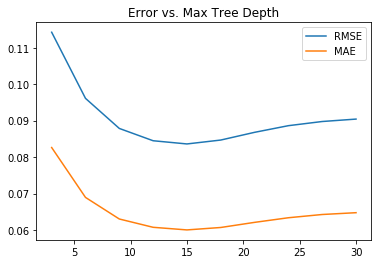

In [26]:
import matplotlib.pyplot as plt

plt.plot(range(3,31,3),rmse_errs, label="RMSE")
plt.plot(range(3,31,3),mae_errs, label="MAE")
plt.title("Error vs. Max Tree Depth")
plt.legend()

### 2. Measure error for different weak learners (linear regression and dart)

In [21]:
# Error for linear booster
model = xgb.train(params={'booster':'gblinear', 'objective':'reg:squarederror'}, dtrain=train_dm, num_boost_round=10)
ypred = model.predict(test_dm)

# Measure RMSE error
rmse = np.sqrt(np.mean((ypred-test_labels.values)**2))
print("RMSE Error: ", rmse)
print()

# Measure MAE error (metric used in Kaggle)
print("MAE Error", mae(test_labels,ypred))

RMSE Error:  0.1451679306101498

MAE Error 0.11260800349923059


In [22]:
# Error for dart booster
model = xgb.train(params={'booster':'dart', 'objective':'reg:squarederror'}, dtrain=train_dm, num_boost_round=10)
ypred = model.predict(test_dm)

# Measure RMSE error
rmse = np.sqrt(np.mean((ypred-test_labels.values)**2))
print("RMSE Error: ", rmse)
print()

# Measure MAE error (metric used in Kaggle)
print("MAE Error", mae(test_labels,ypred))

RMSE Error:  0.09612027941945019

MAE Error 0.06893816291901342


# Model performance after PCA

In [34]:
# Preprocess data
import pca
train_df, test_df, train_labels, test_labels = pca.perform_pca()

C:\Users\Rafael\Anaconda2\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\Rafael\Anaconda2\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [35]:
# Display train/test features (no labels)
display(train_df)
display(test_df)

,pca_0,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,...,pca_23,pca_24,pca_25,pca_26,pca_27,pca_28,pca_29,pca_30,pca_31,pca_32
0,-1.986950,-2.388450,1.406212,0.675008,-0.999795,-0.030845,0.264930,0.025752,-0.060479,-0.041292,...,0.065580,0.094422,-0.414377,0.347573,-0.373442,0.121455,-0.088003,0.251396,-0.001133,0.083514
1,-1.141445,-0.834172,-1.904928,-0.310922,-1.137956,-0.265399,-0.096705,-0.220284,0.221458,0.004908,...,0.107211,0.176551,0.772250,-0.164568,0.758326,-0.157272,0.070197,-0.056697,-0.043583,0.406304
2,-1.562164,0.615833,-1.138923,0.640944,0.438279,0.561439,-0.354919,-0.704605,1.427628,2.512488,...,0.901690,-0.882682,0.007001,0.105565,-0.632266,0.429445,0.201048,0.399150,-0.088552,0.019614
3,-1.995237,-0.878715,-1.659780,0.731303,-1.123558,-0.149070,0.096406,0.004420,0.185141,-0.078992,...,0.129187,0.087295,-0.097659,0.217672,0.067684,0.250628,0.249361,-0.204151,0.256148,0.163430
4,-1.260979,4.006548,0.392174,1.473854,-0.875352,0.483765,-0.404918,0.627377,-0.302315,-0.453501,...,-0.059753,0.092770,0.147510,0.089638,-0.978327,-0.573631,0.451872,0.240199,0.167723,-0.075091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446960,3.977581,0.041978,-1.299364,3.120840,-0.465652,1.019509,-0.198287,-1.962824,-0.498052,0.048309,...,-0.867462,0.116922,0.489211,-0.508915,0.565459,-0.114995,0.172297,1.421186,-0.127884,-0.773950
4446962,-2.079903,3.494165,0.021269,-0.171307,-0.647325,0.356099,0.052448,-0.793387,0.850078,0.210447,...,0.370058,0.368338,0.081183,0.027184,0.002592,0.626562,0.534779,-0.944794,0.442515,-0.410457
4446963,-1.611804,-0.922254,-1.734638,0.658284,-1.221399,-0.330148,0.080347,0.330251,0.279217,-0.029426,...,0.395334,0.376930,0.118784,0.249464,-0.008294,0.420172,0.283007,-0.223814,0.006275,0.295446
4446964,3.633641,-0.564845,-1.658581,0.079188,-1.450857,-1.028566,-0.080154,0.582309,-0.526514,0.211391,...,-0.720673,2.343805,1.163859,1.945132,0.625375,0.148181,0.123387,0.154617,0.719513,-0.383414


,pca_0,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,...,pca_23,pca_24,pca_25,pca_26,pca_27,pca_28,pca_29,pca_30,pca_31,pca_32
12,-0.195589,-0.436675,-2.316750,-2.766645,-1.220409,0.014773,0.465998,-0.619305,0.373015,-0.114585,...,-0.491466,0.242610,0.920510,0.278594,-1.726505,1.830989,0.003608,0.255227,-1.090517,0.446722
14,1.275370,-2.000597,1.592499,-0.631748,-1.225758,-0.566336,0.216673,0.356547,-0.601942,0.306852,...,-0.912953,1.070082,0.605881,-0.034522,-0.701746,-0.054437,0.454388,0.174370,0.023399,-0.027710
20,2.683393,1.499044,-1.218208,-1.649264,1.221156,-1.710661,0.773394,-0.303652,-0.615718,-0.052772,...,-1.125721,0.787756,-1.374866,-0.125480,0.738293,0.695381,-0.024963,1.003250,0.670099,0.464011
33,0.294224,-2.597932,0.960265,-1.014728,-1.318812,-1.168991,0.174491,0.731765,-0.360730,-0.078559,...,-1.700007,2.715739,1.401900,1.272640,0.692720,0.666674,0.798500,-0.471339,1.205464,0.109418
35,-1.326582,3.996719,0.461143,1.533242,-0.896628,0.476363,-0.363797,0.656598,-0.396446,-0.433696,...,-0.071563,0.120924,0.006713,-0.348271,-0.952973,-0.358759,-0.081106,0.473649,-0.100681,0.145847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446937,1.380402,0.987250,-0.975450,0.621863,1.262643,-1.676290,0.502888,0.498820,0.243228,-0.159976,...,0.740158,-0.642571,-0.447905,-0.166615,0.531998,0.599772,0.462159,0.782983,-0.047279,-0.828240
4446944,0.415801,1.340391,-1.085565,-0.268030,1.592744,-0.893263,0.601820,-0.940776,0.163619,-0.261958,...,-0.459424,0.155991,0.704030,-0.153410,0.218198,1.138168,0.055074,1.098640,-0.163440,0.269859
4446949,-0.490942,0.868744,-1.097592,1.090333,1.593107,-1.063418,0.610536,-0.467039,-0.132199,-0.198135,...,0.046561,0.322372,0.391670,-0.817116,-0.342101,-0.317714,-0.003801,0.283400,0.014017,-0.228959
4446955,-1.767402,0.862158,-1.346115,-0.814339,0.539042,0.811617,-0.445012,-1.767648,0.988092,2.509778,...,0.046973,-0.022925,0.330036,0.065177,0.369010,-0.233662,-0.185072,0.146950,-0.328284,0.048297


In [36]:
# Check for nan
print(np.any(train_df.isna().values))
print(np.any(test_df.isna().values))
print(np.any(train_labels.isna().values))
print(np.any(test_labels.isna().values))

False
False
False
False


In [37]:
# Create DMatrix objects for train data features (no labels), train data and test data
train_dm = xgb.DMatrix(train_df, label=train_labels, missing=0)
test_dm = xgb.DMatrix(test_df, missing=0)

C:\Users\Rafael\Anaconda2\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Rafael\Anaconda2\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [38]:
# Train and test model
start = time.time() # Start timer

model = xgb.train(params={'objective':'reg:squarederror'}, dtrain=train_dm, num_boost_round=10)

end = time.time() # End timer
print("Time elapsed for training: ", end-start)

ypred = model.predict(test_dm)

Time elapsed for training:  76.54458546638489


In [39]:
# Measure RMSE error
rmse = np.sqrt(np.mean((ypred-test_labels.values)**2))
print("RMSE Error: ", rmse)
print()

# Measure MAE error (metric used in Kaggle)
print("MAE Error", mae(test_labels,ypred))

RMSE Error:  0.12954903629688852

MAE Error 0.097396016675129


# Model performance after Random Projection

In [40]:
# Preprocess data
import randomProj
train_df, test_df, train_labels, test_labels = randomProj.perform_randomProj()

# Create DMatrix objects for train data features (no labels), train data and test data
train_dm = xgb.DMatrix(train_df, label=train_labels, missing=0)
test_dm = xgb.DMatrix(test_df, missing=0)

C:\Users\Rafael\Anaconda2\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\Rafael\Anaconda2\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\Rafael\Anaconda2\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Rafael\Anaconda2\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not No

In [41]:
# Train and test model
start = time.time() # Start timer

model = xgb.train(params={'objective':'reg:squarederror'}, dtrain=train_dm, num_boost_round=10)

end = time.time() # End timer
print("Time elapsed for training: ", end-start)

ypred = model.predict(test_dm)

Time elapsed for training:  77.39795446395874


In [42]:
# Measure RMSE error
rmse = np.sqrt(np.mean((ypred-test_labels.values)**2))
print("RMSE Error: ", rmse)
print()

# Measure MAE error (metric used in Kaggle)
print("MAE Error", mae(test_labels,ypred))

RMSE Error:  0.13180596087479632

MAE Error 0.09843997764526116
